In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab     stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1    -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2    -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3    -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4    -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  unstable  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803    stable  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810    stable  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  unstable  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  unstable  

[10000 rows x 14 columns]

In [4]:
df.describe().T

count      mean       std       min       25%       50%       75%  \
tau1  10000.0  5.250000  2.742548  0.500793  2.874892  5.250004  7.624690   
tau2  10000.0  5.250001  2.742549  0.500141  2.875140  5.249981  7.624893   
tau3  10000.0  5.250004  2.742549  0.500788  2.875522  5.249979  7.624948   
tau4  10000.0  5.249997  2.742556  0.500473  2.874950  5.249734  7.624838   
p1    10000.0  3.750000  0.752160  1.582590  3.218300  3.751025  4.282420   
p2    10000.0 -1.250000  0.433035 -1.999891 -1.624901 -1.249966 -0.874977   
p3    10000.0 -1.250000  0.433035 -1.999945 -1.625025 -1.249974 -0.875043   
p4    10000.0 -1.250000  0.433035 -1.999926 -1.624960 -1.250007 -0.875065   
g1    10000.0  0.525000  0.274256  0.050009  0.287521  0.525009  0.762435   
g2    10000.0  0.525000  0.274255  0.050053  0.287552  0.525003  0.762490   
g3    10000.0  0.525000  0.274255  0.050054  0.287514  0.525015  0.762440   
g4    10000.0  0.525000  0.274255  0.050028  0.287494  0.525002  0.762433   
stab  10000.0  0.015731  0.036919 -0.080760 -0.015557  0.017142  0.044878   

           max  
tau1  9.999469  
tau2  9.999837  
tau3  9.999450  
tau4  9.999443  
p1    5.864418  
p2   -0.500108  
p3   -0.500072  
p4   -0.500025  
g1    0.999937  
g2    0.999944  
g3    0.999982  
g4    0.999930  
stab  0.109403

In [5]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [6]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [7]:
data_df = df.drop(columns=['stab'])
X = data_df.drop(columns='stabf')
y = data_df['stabf']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [9]:
def scaler(df):
    """
    Scales the dataframe
    """
    scaler = MinMaxScaler()
    normalised_df = scaler.fit_transform(df)
    return pd.DataFrame(normalised_df, columns=df.columns)

In [10]:
# Scale the data
x_train = scaler(x_train)
x_test = scaler(x_test)

In [11]:
def metrics(model, predicted_value, real_value):
    """
    Calculates metrics
    """
    cnf_mat = confusion_matrix(y_true=real_value, y_pred=predicted_value, labels=['stable', 'unstable'])
    print("Confusion Matrix")
    print(cnf_mat)
#     plot_confusion_matrix(model, predicted_value, real_value)
    
    accuracy = accuracy_score(y_true=real_value, y_pred=predicted_value)
    print('Accuracy: {}'.format(round(accuracy*100, 2)))
    
    f1 = f1_score(y_true=y_test, y_pred=predicted_value, pos_label='stable')
    print('F1: {}'.format(round(f1*100, 2)))
    
    precision = precision_score(y_true=y_test, y_pred=predicted_value, pos_label='stable')
    print('Precision: {}'.format(round(precision*100, 2)))
    
    recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')
    print('Recall: {}'.format(round(recall*100, 2)))

In [12]:
# Random forest Regression
randomforest_model = RandomForestClassifier(random_state=1)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [13]:
new_predictions = randomforest_model.predict(x_test)

In [14]:
metrics(randomforest_model, new_predictions, y_test)

Confusion Matrix
[[ 624   88]
 [  55 1233]]
Accuracy: 92.85
F1: 89.72
Precision: 91.9
Recall: 87.64


In [15]:
etc_model = ExtraTreesClassifier(random_state=1)
etc_model.fit(x_train, y_train)

new_predictions = etc_model.predict(x_test)

In [16]:
metrics(etc_model, new_predictions, y_test)

Confusion Matrix
[[ 610  102]
 [  39 1249]]
Accuracy: 92.95
F1: 89.64
Precision: 93.99
Recall: 85.67


In [17]:
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(x_train, y_train)

new_predictions = xgb_model.predict(x_test)

In [18]:
metrics(xgb_model, new_predictions, y_test)

Confusion Matrix
[[ 648   64]
 [  45 1243]]
Accuracy: 94.55
F1: 92.24
Precision: 93.51
Recall: 91.01


In [19]:
lgb_model = LGBMClassifier(random_state=1)
lgb_model.fit(x_train, y_train)

new_predictions = lgb_model.predict(x_test)

In [20]:
metrics(lgb_model, new_predictions, y_test)

Confusion Matrix
[[ 642   70]
 [  50 1238]]
Accuracy: 94.0
F1: 91.45
Precision: 92.77
Recall: 90.17


In [21]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

In [22]:
etc_model = ExtraTreesClassifier(random_state=1)
random_cv = RandomizedSearchCV(estimator=etc_model,
            param_distributions=hyperparameter_grid,
            random_state=1)
random_cv.fit(x_train, y_train)

new_predictions = random_cv.predict(x_test)

In [23]:
metrics(random_cv, new_predictions, y_test)

Confusion Matrix
[[ 621   91]
 [  53 1235]]
Accuracy: 92.8
F1: 89.61
Precision: 92.14
Recall: 87.22


In [24]:
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

Feature: 0, Score: 0.13724
Feature: 1, Score: 0.14051
Feature: 2, Score: 0.13468
Feature: 3, Score: 0.13542
Feature: 4, Score: 0.00368
Feature: 5, Score: 0.00534
Feature: 6, Score: 0.00543
Feature: 7, Score: 0.00496
Feature: 8, Score: 0.10256
Feature: 9, Score: 0.10758
Feature: 10, Score: 0.11306
Feature: 11, Score: 0.10954


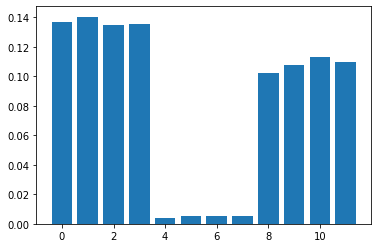

In [25]:
importance = random_cv.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()